## Task 0.1:

### PREDICTING A PERSON IS HOME OR NOT DURING THE DAY TIME

### Phase 1: Data Prepration and Visualisation

### Group Name : Group 6
Name : Varun Chandra Shekar  
Student ID: s4017549

## Task 0.2:

### Table of Content
- Introduction
  - Dataset Source
  - Dataset Details
  - Dataset Features
  - Target Feature
- Goals and Objectives
- Data Cleaning and Preprocessing
  - 1. Dropping Irrelevant columns
  - 2. Renaming Column Names
  - 3. Handling Missing Values
  - 4. Outlier Detection
- Data Exploration and Visualisation
    - 1. Univariate Visualisation
    - 2. Two Variable Visualisation
    - 3. Three Variable Visualisation
- Literature Review
- Summary
- References

## Task 1:

### Introduction

### Task 1.1:

### Dataset Source

The **Smart Grid Smart City (SGSC) Customer Trial dataset** used in this notebook was sourced from the official Australian government open data platform [data.gov.au](https://data.gov.au). This dataset was released as part of the Australian Government’s *Smart Grid, Smart City* initiative, which aimed to evaluate the costs and benefits of smart grid technologies. It contains detailed information about household electricity consumption, demographics, appliance usage, and various smart energy interventions collected during a trial period.


### Task 1.2:

### Dataset Details

In [14]:
#Importing necessary libraries for the notebook
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) 
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ks_2samp

In [15]:
#Loading the data using the read_csv format
data = pd.read_csv("Phase1_Group6.csv")

In [16]:
#Checking the size of the dataset using the function shape()
data.shape

(78720, 46)

In [17]:
#I am printing the first 10 values of the dataset for preview
data.head(10)

CUSTOMER_KEY TRIAL_CUSTOMER_TYPE CONTROL_GROUP_FLAG TARIFF_PRODUCT_CD  \
0       8459115              Retail                  N               NaN   
1      10015988              Retail                  N               NaN   
2       8922450              Retail                  N               NaN   
3       8922462             Network                  N               NaN   
4       8922472             Network                  N         NETDPRPPE   
5      11189125              Retail                  N               NaN   
6      11189127              Retail                  N               NaN   
7      11189133              Retail                  N               NaN   
8      11189135              Retail                  N               NaN   
9      11189137              Retail                  N               NaN   

  FEEDBACK_TECH1_PRODUCT_CD FEEDBACK_TECH2_PRODUCT_CD  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   
5                       NaN                       NaN   
6                       NaN                       NaN   
7                       NaN                       NaN   
8                       NaN                       NaN   
9                       NaN                       NaN   

  LIFESTYLE_AUDIT_PRODUCT_CD  INFERRED_CELL  VERIFIED_CELL SERVICE_TYPE  \
0                        NaN             14            NaN     Domestic   
1                        NaN             60            NaN     Domestic   
2                        NaN             28            NaN     Domestic   
3                        NaN             28            NaN     Domestic   
4                        NaN             64           64.0     Domestic   
5                        NaN              1            NaN     Domestic   
6                        NaN             37            NaN     Domestic   
7                        NaN             73            NaN     Domestic   
8                        NaN             37            NaN     Domestic   
9                        NaN              1            NaN     Domestic   

   GENERAL_SUPPLY_CNT  CONTROLLED_LOAD_CNT  NET_SOLAR_CNT  GROSS_SOLAR_CNT  \
0                   1                    0              0                0   
1                   1                    0              0                0   
2                   1                    0              0                0   
3                   1                    0              0                0   
4                   1                    0              0                0   
5                   1                    0              0                0   
6                   1                    0              0                0   
7                   1                    0              0                0   
8                   1                    0              0                0   
9                   1                    0              0                0   

   OTHER_LOAD_CNT SERVICE_LOC_STATUS_NAME  ASSRTD_CLIMATE_ZONE_CD  \
0               0          Not a Customer                       5   
1               0          Not a Customer                       5   
2               0          Not a Customer                       5   
3               0          Not a Customer                       5   
4               0            Trial Closed                       5   
5               0          Not a Customer                       6   
6               0          Not a Customer                       6   
7               0          Not a Customer                       6   
8               0          Not a Customer                       6   
9               0          Not a Customer                       6   

  ASSRTD_CLIMATE_ZONE_DESC ASSRTD_DWELLING_TYPE_CD ASSRTD_GAS_USAGE_GROUP_CD  \
0           W

### Task 1.3:

### Dataset Features

In [20]:
#Displaying all the columns that are available in the dataset
data.columns

Index(['CUSTOMER_KEY', 'TRIAL_CUSTOMER_TYPE', 'CONTROL_GROUP_FLAG',
       'TARIFF_PRODUCT_CD', 'FEEDBACK_TECH1_PRODUCT_CD',
       'FEEDBACK_TECH2_PRODUCT_CD', 'LIFESTYLE_AUDIT_PRODUCT_CD',
       'INFERRED_CELL', 'VERIFIED_CELL', 'SERVICE_TYPE', 'GENERAL_SUPPLY_CNT',
       'CONTROLLED_LOAD_CNT', 'NET_SOLAR_CNT', 'GROSS_SOLAR_CNT',
       'OTHER_LOAD_CNT', 'SERVICE_LOC_STATUS_NAME', 'ASSRTD_CLIMATE_ZONE_CD',
       'ASSRTD_CLIMATE_ZONE_DESC', 'ASSRTD_DWELLING_TYPE_CD',
       'ASSRTD_GAS_USAGE_GROUP_CD', 'ASSRTD_ELECTRICITY_USE_GRP_CD',
       'DWELLING_TYPE_CD', 'DRYER_USAGE_CD', 'REDUCING_CONSUMPTION_CD',
       'AIRCON_TYPE_CD', 'NUM_REFRIGERATORS', 'NUM_ROOMS_HEATED',
       'HAS_GENERATION', 'HAS_INTERNET_ACCESS', 'HAS_GAS', 'HAS_GAS_HEATING',
       'HAS_GAS_HOT_WATER', 'HAS_GAS_COOKING', 'HAS_POOLPUMP', 'HAS_AIRCON',
       'HAS_GAS_OTHER_APPLIANCE', 'IS_HOME_DURING_DAYTIME',
       'HAS_AGREED_TO_SMS', 'SMART_METER_INSTALLATION_DATE',
       'LIFESTYLE_AUDIT_PERFORMED_DATE', 

In [21]:
#Checking the type of the columns that are there in the dataset
data.dtypes

CUSTOMER_KEY                        int64
TRIAL_CUSTOMER_TYPE                object
CONTROL_GROUP_FLAG                 object
TARIFF_PRODUCT_CD                  object
FEEDBACK_TECH1_PRODUCT_CD          object
FEEDBACK_TECH2_PRODUCT_CD          object
LIFESTYLE_AUDIT_PRODUCT_CD         object
INFERRED_CELL                       int64
VERIFIED_CELL                     float64
SERVICE_TYPE                       object
GENERAL_SUPPLY_CNT                  int64
CONTROLLED_LOAD_CNT                 int64
NET_SOLAR_CNT                       int64
GROSS_SOLAR_CNT                     int64
OTHER_LOAD_CNT                      int64
SERVICE_LOC_STATUS_NAME            object
ASSRTD_CLIMATE_ZONE_CD              int64
ASSRTD_CLIMATE_ZONE_DESC           object
ASSRTD_DWELLING_TYPE_CD            object
ASSRTD_GAS_USAGE_GROUP_CD          object
ASSRTD_ELECTRICITY_USE_GRP_CD      object
DWELLING_TYPE_CD                   object
DRYER_USAGE_CD                     object
REDUCING_CONSUMPTION_CD           

In [22]:
#Overall description of the dataset and the meaning of each column in the dataset
table = [
    ["CUSTOMER_KEY", "int64", "Generic ID of the household."],
    ["TRIAL_CUSTOMER_TYPE", "object", "Type of customer trial participation."],
    ["CONTROL_GROUP_FLAG", "object", "Indicates if household was in control group."],
    ["TARIFF_PRODUCT_CD", "object", "Tariff code applied to the household."],
    ["FEEDBACK_TECH1_PRODUCT_CD", "object", "Primary feedback technology code."],
    ["FEEDBACK_TECH2_PRODUCT_CD", "object", "Secondary feedback technology code."],
    ["LIFESTYLE_AUDIT_PRODUCT_CD", "object", "Lifestyle audit product code."],
    ["CENSUS_GROUP_CODE", "int64", "ABS census group code."],
    ["INFERRED_CELL", "int64", "Internal reference - not relevant for modeling."],
    ["VERIFIED_CELL", "float64", "Verified cell info - internal use only."],
    ["LOCATION_TYPE_CD", "object", "Whether the location is metro or non-metro."],
    ["SERVICE_TYPE", "object", "All customers are households (domestic)."],
    ["GENERAL_SUPPLY_CNT", "int64", "Number of general supply meters."],
    ["CONTROLLED_LOAD_CNT", "int64", "Number of controlled load meters."],
    ["NET_SOLAR_CNT", "int64", "Number of net solar meters at the household."],
    ["GROSS_SOLAR_CNT", "int64", "Number of gross solar meters at the household."],
    ["OTHER_LOAD_CNT", "int64", "Number of other load meters at the household."],
    ["SERVICE_LOC_STATUS_NAME", "object", "Status of the customer in the trial (active, opted out, etc)."],
    ["ASSRTD_CLIMATE_ZONE_CD", "int64", "Numerical climate zone code."],
    ["ASSRTD_CLIMATE_ZONE_DESC", "object", "Description of the climate zone."],
    ["ASSRTD_DWELLING_TYPE_CD", "object", "Assumed dwelling type (unit or not)."],
    ["ASSRTD_GAS_USAGE_GROUP_CD", "object", "Level of assumed gas usage."],
    ["ASSRTD_ELECTRICITY_USE_GRP_CD", "object", "Level of assumed electricity usage."],
    ["DWELLING_TYPE_CD", "object", "Self-reported dwelling type (house, unit, etc)."],
    ["DRYER_USAGE_CD", "object", "Level of clothes dryer usage in the household."],
    ["REDUCING_CONSUMPTION_CD", "object", "Self-reported effort to reduce energy consumption."],
    ["AIRCON_TYPE_CD", "object", "Type of air conditioning installed."],
    ["NUM_REFRIGERATORS", "float64", "Number of refrigerators in the household."],
    ["NUM_ROOMS_HEATED", "float64", "Number of rooms connected to a heating system."],
    ["HAS_GENERATION", "object", "Indicates if the household generates electricity."],
    ["HAS_INTERNET_ACCESS", "object", "Whether the household has internet access."],
    ["HAS_GAS", "object", "Whether the household uses gas."],
    ["HAS_GAS_HEATING", "object", "Whether gas is used for heating."],
    ["HAS_GAS_HOT_WATER", "object", "Whether gas is used for hot water."],
    ["HAS_GAS_COOKING", "object", "Whether gas is used for cooking."],
    ["HAS_POOLPUMP", "object", "Whether the household has a pool pump."],
    ["HAS_AIRCON", "object", "Whether the household has air conditioning."],
    ["HAS_GAS_OTHER_APPLIANCE", "object", "Whether the household has other gas appliances."],
    ["IS_HOME_DURING_DAYTIME", "object", "Target variable: Whether someone is home during the day."],
    ["HAS_AGREED_TO_SMS", "object", "Whether the customer agreed to be contacted via SMS."],
    ["SMART_METER_INSTALLATION_DATE", "object", "Date when smart meter was installed."],
    ["LIFESTYLE_AUDIT_PERFORMED_DATE", "float64", "Date lifestyle audit was performed (if any)."],
    ["PROVISIONING_COMPLETE_DATE", "object", "Date product offers were provisioned/deprovisioned."],
    ["OFFER_WITHDRAWN_DATE", "object", "Date when offer was withdrawn."],
    ["ACCEPTANCE_WITHDRAWN_DATE", "object", "Date when customer withdrew acceptance."],
    ["OPERATION_START_DATE", "object", "Start date of the customer trial operation."],
    ["OPERATION_FINISH_DATE", "object", "Finish date of the customer trial operation."],
    ["AGREEMENT_EXIT_REASON", "object", "Reason for customer leaving the trial."]
    
]

print(tabulate(table, headers=["Feature Name", "Data Type", "Description"], tablefmt="fancy_grid"))

╒════════════════════════════════╤═════════════╤═══════════════════════════════════════════════════════════════╕
│ Feature Name                   │ Data Type   │ Description                                                   │
╞════════════════════════════════╪═════════════╪═══════════════════════════════════════════════════════════════╡
│ CUSTOMER_KEY                   │ int64       │ Generic ID of the household.                                  │
├────────────────────────────────┼─────────────┼───────────────────────────────────────────────────────────────┤
│ TRIAL_CUSTOMER_TYPE            │ object      │ Type of customer trial participation.                         │
├────────────────────────────────┼─────────────┼───────────────────────────────────────────────────────────────┤
│ CONTROL_GROUP_FLAG             │ object      │ Indicates if household was in control group.                  │
├────────────────────────────────┼─────────────┼────────────────────────────────────────────────

### Task 1.4:

### Target Feature

For this project, the target feature in this dataset is **IS_HOME_DURING_DAYTIME**, which is a binary variable indicating whether someone from the household is at home during the daytime on weekdays (standard business hours).

## Task 2:

### Goals and Objectives

The goal of this project is to build a predictive model that determines whether a person is likely to be at home during daytime hours based on behavioral and household characteristics. This prediction has real-world implications for improving energy efficiency, optimizing smart grid performance, and enabling more intelligent demand-side energy management. Especially in a country like Australia, where energy equity and renewable energy integration are national priorities, having accurate occupancy insights can support targeted interventions, reduce electricity waste, and help remote communities with smarter energy delivery.

To achieve this, I will make use of a rich dataset collected during the Smart Grid, Smart City (SGSC) trial. The dataset contains a mix of demographic indicators, appliance ownership, and usage-related features, which together offer a promising basis for non-intrusive occupancy detection. The idea is to avoid relying on sensor data or real-time surveillance by leveraging patterns hidden within existing household data.

Alongside building the predictive model, I will explore and analyze the dataset through a combination of visualization and statistical techniques to better understand how each variable contributes to the occupancy patterns. This exploration will also help guide the data cleaning and feature selection steps, ensuring that the final model is not only accurate but also interpretable and practical for real-world application.

## Task 3:

### Data Cleaning and Preprocessing 

### 1. Dropping Irrelevant columns

In [32]:
#I have put the features that according to my assumption are not relelvant to this dataset
irrelevant_cols = [
    'CUSTOMER_KEY', 'INFERRED_CELL', 'VERIFIED_CELL',
    'SERVICE_TYPE', 'SMART_METER_INSTALLATION_DATE', 'LIFESTYLE_AUDIT_PERFORMED_DATE',
    'PROVISIONING_COMPLETE_DATE', 'OFFER_WITHDRAWN_DATE',
    'ACCEPTANCE_WITHDRAWN_DATE', 'OPERATION_START_DATE',
    'OPERATION_FINISH_DATE', 'AGREEMENT_EXIT_REASON', 'TRIAL_CUSTOMER_TYPE', 
    'CONTROL_GROUP_FLAG', 'TARIFF_PRODUCT_CD',
    'FEEDBACK_TECH1_PRODUCT_CD', 'FEEDBACK_TECH2_PRODUCT_CD',
    'LIFESTYLE_AUDIT_PRODUCT_CD', 'GENERAL_SUPPLY_CNT',
    'CONTROLLED_LOAD_CNT', 'NET_SOLAR_CNT', 'GROSS_SOLAR_CNT',
    'OTHER_LOAD_CNT', 'SERVICE_LOC_STATUS_NAME',
    'ASSRTD_CLIMATE_ZONE_CD', 'HAS_AGREED_TO_SMS', 'DWELLING_TYPE_CD',
    'HAS_GAS_HEATING', 'HAS_GAS_HOT_WATER', 'HAS_GAS_COOKING',
    'HAS_GAS_OTHER_APPLIANCE', 'AIRCON_TYPE_CD', 'HAS_GAS', 'REDUCING_CONSUMPTION_CD'
]
data.drop(columns=irrelevant_cols, inplace=True, errors='ignore')

I removed several columns from the original dataset, including **CUSTOMER_KEY**, **INFERRED_CELL**, **VERIFIED_CELL**, and various timestamp fields such as **SMART_METER_INSTALLATION_DATE**, **OPERATION_START_DATE**, **OFFER_WITHDRAWN_DATE**, and others. These were dropped for the following reasons:

- **Identifiers (e.g., CUSTOMER_KEY)**: These columns serve only as unique identifiers for each household and have no predictive value. Including such columns could lead to overfitting or data leakage, as the model might mistakenly learn patterns based on IDs instead of meaningful household characteristics.

- **Internal Reference Codes (e.g., INFERRED_CELL, VERIFIED_CELL)**: These are internal project-specific metadata with no connection to actual household behavior or energy usage. I removed them to avoid introducing noise.

- **Constant Fields (e.g., SERVICE_TYPE)**: Columns where all values are the same, like **SERVICE_TYPE** which is always “Domestic,” do not help the model differentiate between examples and therefore were removed.

- **Administrative Timestamps**: Several columns such as **OPERATION_FINISH_DATE**, **LIFESTYLE_AUDIT_PERFORMED_DATE**, **OFFER_WITHDRAWN_DATE**, etc., capture administrative or post-trial events. These values would not be known at the time of prediction and using them would result in *target leakage*. Hence, I excluded all such date fields.

- **Redundant Gas Features**: I also removed columns such as **HAS_GAS_HEATING**, **HAS_GAS_HOT_WATER**, **HAS_GAS_COOKING**, and **HAS_OTHER_GAS_APPLIANCE**. These features are highly correlated with **HAS_GAS**, which already captures whether the household uses gas. Including both introduces redundancy, and keeping only **HAS_GAS** makes the dataset more concise and avoids multicollinearity.

- **Air Conditioning Type (AIRCON_TYPE_CD)**: Instead of retaining multiple detailed air conditioning types, I opted to keep only **HAS_AIRCON**, which simplifies the feature and retains the essential information. This binary feature is easier to model and interpret compared to categorical values that might not offer significant added benefit.


In [34]:
#After removing the above columns this is the current dataset shape
print(data.columns)
print(data.shape)

Index(['ASSRTD_CLIMATE_ZONE_DESC', 'ASSRTD_DWELLING_TYPE_CD',
       'ASSRTD_GAS_USAGE_GROUP_CD', 'ASSRTD_ELECTRICITY_USE_GRP_CD',
       'DRYER_USAGE_CD', 'NUM_REFRIGERATORS', 'NUM_ROOMS_HEATED',
       'HAS_GENERATION', 'HAS_INTERNET_ACCESS', 'HAS_POOLPUMP', 'HAS_AIRCON',
       'IS_HOME_DURING_DAYTIME'],
      dtype='object')
(78720, 12)


### 2. Renaming Column Names

To streamline the modeling process and improve readability throughout the notebook, I renamed several columns to more intuitive and user-friendly names. I am removing underscores and simplifying technical abbreviations, particularly those beginning with "ASSRTD".

In [37]:
#I am going to use a dictionary to rename the columns
cols_rename = {
    'ASSRTD_ELECTRICITY_USE_GRP_CD': 'ElectricityUse',
    'ASSRTD_GAS_USAGE_GROUP_CD': 'GasUse',
    'ASSRTD_DWELLING_TYPE_CD': 'UnitType',
    'DRYER_USAGE_CD': 'DryerUse',
    'NUM_REFRIGERATORS': 'NumFridges',
    'NUM_ROOMS_HEATED': 'NumHeatedRooms',
    'HAS_GENERATION': 'HasGeneration',
    'HAS_INTERNET_ACCESS': 'HasInternet',
    'HAS_POOLPUMP': 'HasPoolPump',
    'HAS_AIRCON': 'HasAircon',
    'IS_HOME_DURING_DAYTIME': 'IsHomeDaytime',
    'ASSRTD_CLIMATE_ZONE_DESC': 'ClimateZone'
}

data.rename(columns=cols_rename, inplace=True)

In [38]:
#These are the new column names after renaming
data.columns

Index(['ClimateZone', 'UnitType', 'GasUse', 'ElectricityUse', 'DryerUse',
       'NumFridges', 'NumHeatedRooms', 'HasGeneration', 'HasInternet',
       'HasPoolPump', 'HasAircon', 'IsHomeDaytime'],
      dtype='object')

### 3. Handling Missing Values

In [40]:
# Count missing values in each column
print("I am checking the number of missing values in each columns")
print(data.isnull().sum())

I am checking the number of missing values in each columns
ClimateZone           0
UnitType              0
GasUse                0
ElectricityUse        0
DryerUse          66171
NumFridges        66170
NumHeatedRooms    66170
HasGeneration         0
HasInternet       60349
HasPoolPump       60349
HasAircon         60349
IsHomeDaytime     60349
dtype: int64


In [41]:
target = 'IsHomeDaytime'
missing_mask = data[target].isna()

cols = [
    'ClimateZone', 'UnitType', 'GasUse', 'ElectricityUse',
    'DryerUse', 'HasInternet', 'HasPoolPump',  'HasGeneration'
]
for col in cols:
    contingency = pd.crosstab(data[col], missing_mask)
    stat, p, dof, expected = chi2_contingency(contingency)
    print(f"{col}: p-value = {p:.4f}")
    if p < 0.05:
        print("Potential bias introduced.")
    else:
        print("No strong evidence of bias.")

ClimateZone: p-value = 0.0000
Potential bias introduced.
UnitType: p-value = 0.0000
Potential bias introduced.
GasUse: p-value = 0.0000
Potential bias introduced.
ElectricityUse: p-value = 0.0000
Potential bias introduced.
DryerUse: p-value = 1.0000
No strong evidence of bias.
HasInternet: p-value = 1.0000
No strong evidence of bias.
HasPoolPump: p-value = 1.0000
No strong evidence of bias.
HasGeneration: p-value = 0.0000
Potential bias introduced.


The goal of my project is to predict whether someone is at home during the day (**IsHomeDaytime**), so this column is the target variable for all my modeling. Since suprevised learning models can only learn from rows that have a label, I decided to drop the rows where this target value was missing.

I don’t think this introduces bias because I’m not removing data based on any feature—just rows where we don’t know the outcome.  Just to be sure, I ran a few statistical checks (like chi-squared tests) to compare the feature distributions between rows that had the target value and those that didn’t. Most of the features didn’t show much difference, which means the missing data wasn’t skewing things too badly. There were one or two features, like **GasUse** and **ElectricityUse** that showed a bit of difference, but overall, the dataset still seems balanced enough to move forward.

In [43]:
#Dropping the columns based on the above analysis I performed
data = data.dropna(subset=['IsHomeDaytime'])

In [44]:
print("New dataset shape, after dropping the missing columns")
print(data.shape)
print("\nThis is the number of missing rows after dropping rows based on the target feature:")
print(data.isnull().sum())

New dataset shape, after dropping the missing columns
(18371, 12)

This is the number of missing rows after dropping rows based on the target feature:
ClimateZone          0
UnitType             0
GasUse               0
ElectricityUse       0
DryerUse          5822
NumFridges        5821
NumHeatedRooms    5821
HasGeneration        0
HasInternet          0
HasPoolPump          0
HasAircon            0
IsHomeDaytime        0
dtype: int64


In [45]:
#Imputing the missing values based on Unittype rather just calculating the median and replacing it:
data['NumFridges'] = (
    data.groupby('UnitType')['NumFridges']
    .transform(lambda x: x.fillna(round(x.median())))
)

In [46]:
# Imputing NumHeatedRooms based on UnitTypeType
data['NumHeatedRooms'] = (
    data.groupby('UnitType')['NumHeatedRooms']
    .transform(lambda x: x.fillna(round(x.median())))
)

To handle the missing values in NumFridges and NumHeatedRooms, I used group-based imputation by filling the missing values with the median value within each UnitType group (i.e., Unit and NotUnit). This approach is more appropriate than using a global average because units and non-units represent structurally different types of units with different characteristics—units tend to have fewer rooms and appliances than standalone houses. Boxplots of the two groups confirmed that their distributions differ significantly. I chose the median instead of the mean because it is more robust to skewed data and outliers, ensuring the imputed values are more representative of the central tendency within each group. This group-wise imputation helps preserve the natural variation between different unit types and avoids introducing unrealistic values into the dataset

In [48]:
data.isna().sum()

ClimateZone          0
UnitType             0
GasUse               0
ElectricityUse       0
DryerUse          5822
NumFridges           0
NumHeatedRooms       0
HasGeneration        0
HasInternet          0
HasPoolPump          0
HasAircon            0
IsHomeDaytime        0
dtype: int64

In [49]:
# Fill missing DryerUse values with global mode
data['DryerUse'].fillna(data['DryerUse'].mode()[0], inplace=True)

In order to handle missing values in the **DryerUse** column, I chose to impute the missing entries with the **mode**, which represents the most frequently occurring value in the column. Since **DryerUse** is a **categorical feature** that likely reflects typical household behavior. 

In [51]:
data.isna().sum()

ClimateZone       0
UnitType          0
GasUse            0
ElectricityUse    0
DryerUse          0
NumFridges        0
NumHeatedRooms    0
HasGeneration     0
HasInternet       0
HasPoolPump       0
HasAircon         0
IsHomeDaytime     0
dtype: int64

### 4. Outlier Detection

In [53]:
# For NumFridges
Q1_fridge = data['NumFridges'].quantile(0.25)
Q3_fridge = data['NumFridges'].quantile(0.75)
IQR_fridge = Q3_fridge - Q1_fridge
upper_fridge = round(Q3_fridge + 1.5 * IQR_fridge)

In [54]:
# For NumHeatedRooms
Q1_heated = data['NumHeatedRooms'].quantile(0.25)
Q3_heated = data['NumHeatedRooms'].quantile(0.75)
IQR_heated = Q3_heated - Q1_heated
upper_heated = round(Q3_heated + 1.5 * IQR_heated)

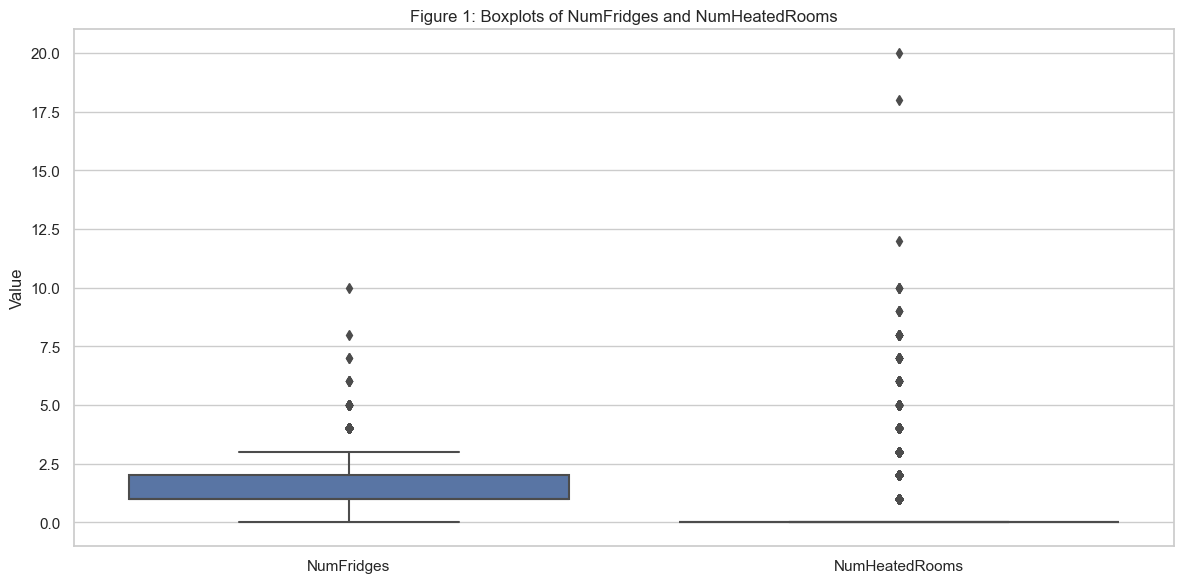

In [55]:
#Plotting the boxplots 
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['NumFridges', 'NumHeatedRooms']])
plt.title('Figure 1: Boxplots of NumFridges and NumHeatedRooms')
plt.ylabel('Value')
plt.xticks([0, 1], ['NumFridges', 'NumHeatedRooms'])

plt.tight_layout()
plt.show()

In [56]:
#Handling the outlier for the number of fridges
data['NumFridges'] = data['NumFridges'].clip(upper=upper_fridge)

In [57]:
#Handling the outlier for the number of heatedrooms
data['NumHeatedRooms'] = data['NumHeatedRooms'].clip(upper=upper_heated)

To handle the outliers present in the **NumFridges** and **NumHeatedRooms** columns, I decided to apply **clipping** using the IQR method. I chose this approach because dropping rows without proper domain knowledge, which is not ideal given the survey-based nature of the dataset.

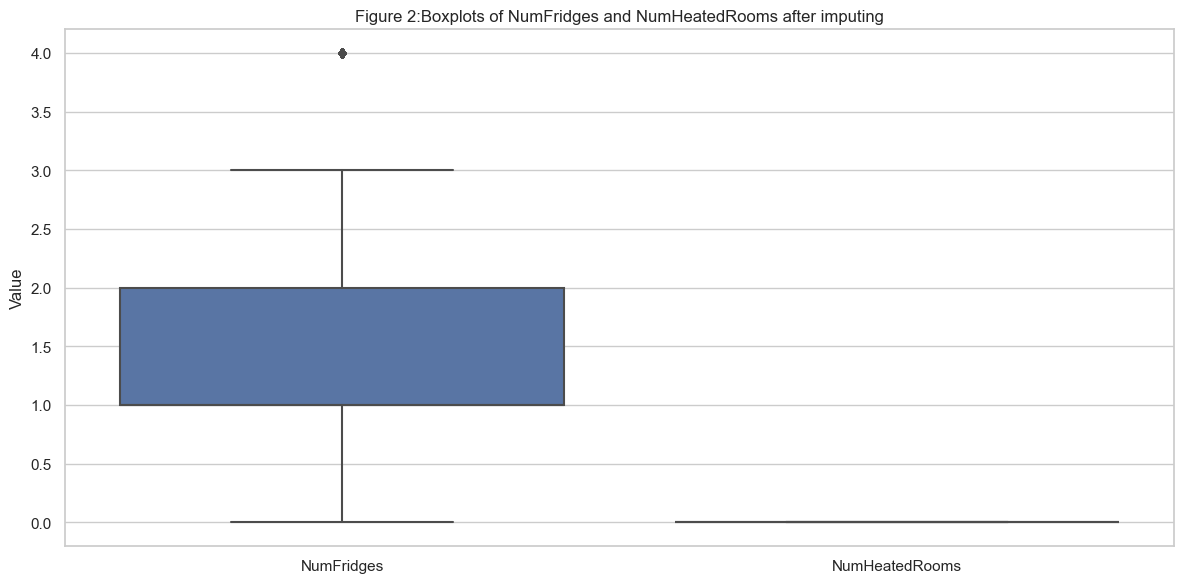

In [59]:
#Plotting the boxplots 
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['NumFridges', 'NumHeatedRooms']])
plt.title('Figure 2:Boxplots of NumFridges and NumHeatedRooms after imputing')
plt.ylabel('Value')
plt.xticks([0, 1], ['NumFridges', 'NumHeatedRooms'])

plt.tight_layout()
plt.show()

## Task 4:

### Data Exploration and Visualisation

### Task 4.1:

### 1. Univariate Visualisations

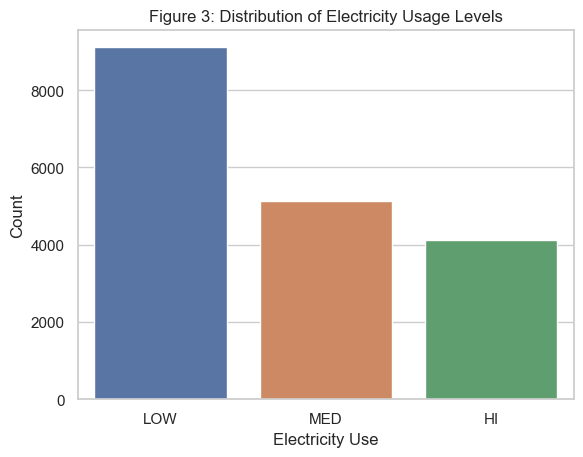

In [64]:
#Distribution of ElectricityUse
sns.countplot(x='ElectricityUse', data=data)
plt.title('Figure 3: Distribution of Electricity Usage Levels')
plt.xlabel('Electricity Use')
plt.ylabel('Count')
plt.show()

From this plot, I observed that most households in the dataset fall into the LOW electricity usage category. The number of households decreases as we move from LOW to MED to HI usage. This indicates that the majority of participants tend to consume relatively less electricity. This could be due to smaller dwelling sizes, fewer appliances, or more energy-conscious behavior. Since the goal of my project is to predict whether someone is home during the day, understanding electricity usage patterns like this could offer useful context—households with higher usage may indicate higher occupancy or activity during the day, which might relate to the target variable.

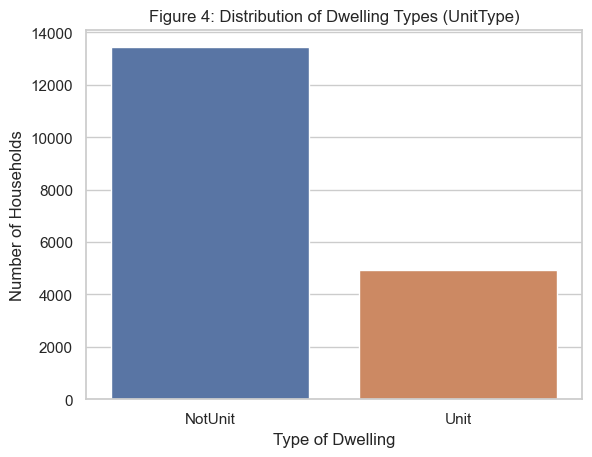

In [66]:
# Distribution of UnitType
sns.countplot(x='UnitType', data=data)
plt.title('Figure 4: Distribution of Dwelling Types (UnitType)')
plt.xlabel('Type of Dwelling')
plt.ylabel('Number of Households')
plt.show()

I visualized the distribution of the UnitType variable to understand the composition of household types in the dataset. As seen in the chart, NotUnit dwellings (such as standalone houses, townhouses, etc.) make up the majority of the dataset, while Unit dwellings (like apartments or flats) are less represented. This is useful context for modeling, as dwelling type may influence daytime occupancy—standalone homes may be more likely to house families or individuals who work from home, while units might be associated with younger or working professionals who are typically away during the day.

### Task 4.2:

### 2. Two Variable Visualisation

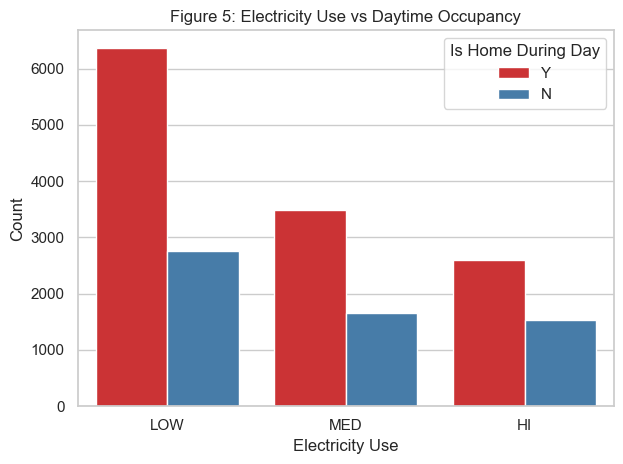

In [70]:
sns.countplot(x='ElectricityUse', hue='IsHomeDaytime', data=data, palette='Set1')
plt.title('Figure 5: Electricity Use vs Daytime Occupancy')
plt.xlabel('Electricity Use')
plt.ylabel('Count')
plt.legend(title='Is Home During Day')
plt.tight_layout()
plt.show()

Based on the plot comparing **Electricity Use vs. Daytime Occupancy**, I observed that households with **low electricity usage** are significantly more likely to have someone at home during the day (**IsHomeDaytime = Y**). As electricity usage increases from **LOW** to **HI**, the number of people who are at home during the day **gradually decreases**, suggesting an inverse relationship. I am assuming that people who spend more time away from home during the day (e.g., for work) tend to use more electricity in the evenings or have more energy-intensive appliances running while they are away. 

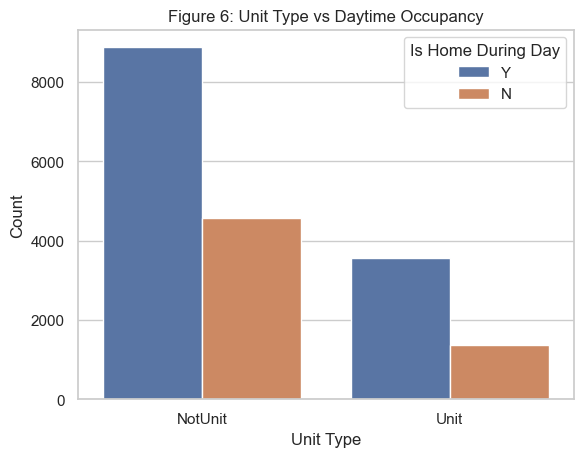

In [72]:
sns.countplot(x='UnitType', hue='IsHomeDaytime', data=data)
plt.title('Figure 6: Unit Type vs Daytime Occupancy')
plt.xlabel('Unit Type')
plt.ylabel('Count')
plt.legend(title='Is Home During Day')
plt.show()

I noticed that people living in **NotUnit** dwellings (e.g., standalone houses) are much more likely to be home during the day compared to those living in **Unit**-type residences (e.g., apartments or flats). This could indicate that households in larger or standalone dwellings may include retirees, remote workers, or stay-at-home family members. In contrast, **Unit** dwellers might be more likely to be working professionals who leave home during the day.

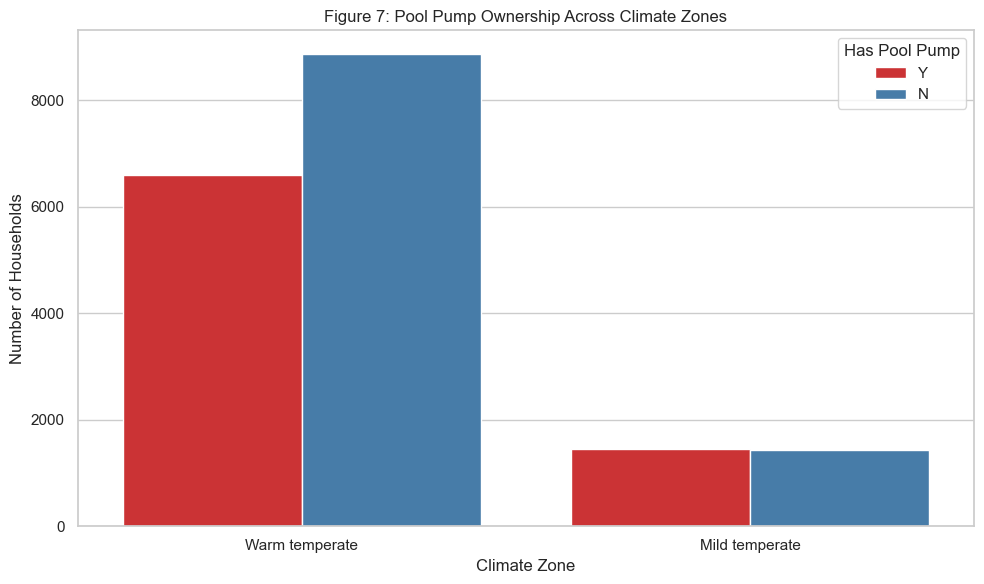

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x="ClimateZone",
    hue="HasPoolPump",
    data=data,
    palette="Set1"
)
plt.title("Figure 7: Pool Pump Ownership Across Climate Zones")
plt.xlabel("Climate Zone")
plt.ylabel("Number of Households")
plt.legend(title="Has Pool Pump")
plt.tight_layout()
plt.show()

From the chart, I observed that pool pump ownership varies quite noticeably between climate zones. In warm temperate areas, there is a significantly higher number of households, and among them, many more have pool pumps compared to households in mild temperate regions. Even though non-ownership is still the majority in warm climates, the number of households with pool pumps is considerably larger than in mild zones.

In mild temperate zones, the number of households is much smaller overall, and ownership of pool pumps is fairly balanced with non-ownership. This pattern suggests that warmer climates may encourage the installation of pools—and by extension, pool pumps—more than milder regions.


### Task 4.3:

### 3. Three Variable Visualisation

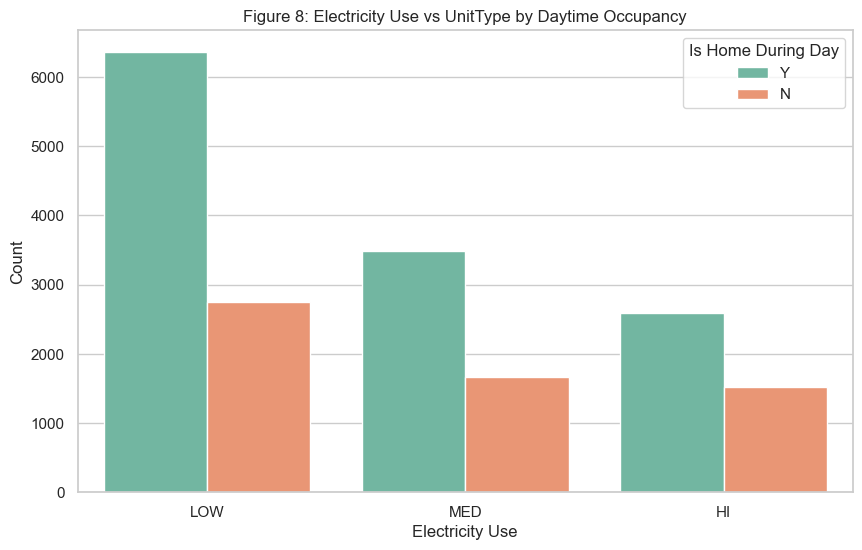

In [78]:
plt.figure(figsize=(10,6))
sns.countplot(x='ElectricityUse', hue='IsHomeDaytime', data=data, palette='Set2', dodge=True)
plt.title('Figure 8: Electricity Use vs UnitType by Daytime Occupancy')
plt.xlabel('Electricity Use')
plt.ylabel('Count')
plt.legend(title='Is Home During Day')
plt.show()

I observed a clear pattern between electricity usage levels and whether someone is home during the day. Most households with **low electricity use** have occupants who are **present during the day**, suggesting lower power consumption aligns with home occupancy—perhaps due to fewer energy-intensive appliances being used.

As electricity usage increases to **medium** and **high**, the number of households where someone is home during the day decreases slightly, but not drastically. Interestingly, even among high electricity users, the number of homes with daytime occupancy is still greater than those without, though the gap is smaller.

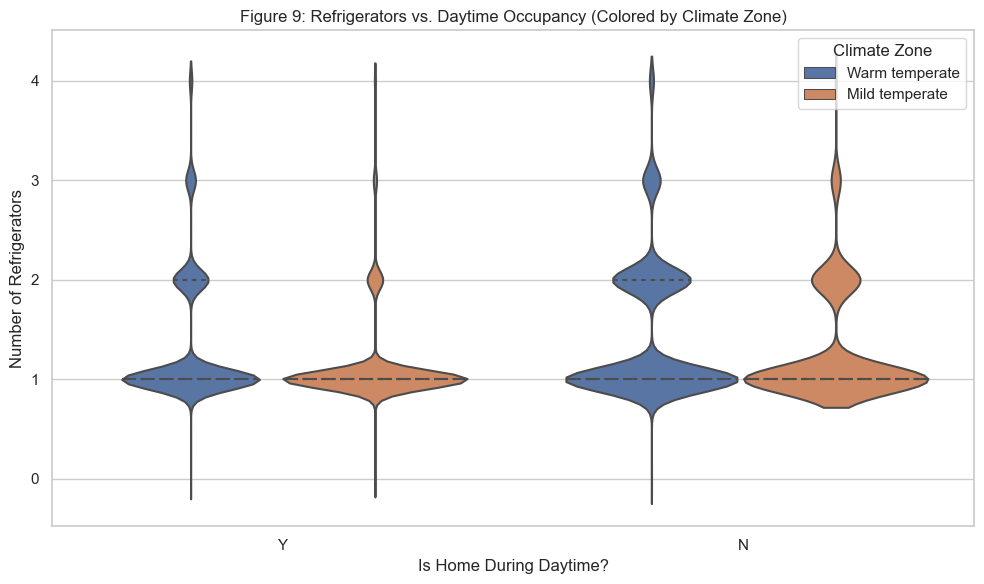

In [80]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x="IsHomeDaytime",
    y="NumFridges",
    hue="ClimateZone",
    data=data,
    inner="quartile"
)
plt.title("Figure 9: Refrigerators vs. Daytime Occupancy (Colored by Climate Zone)")
plt.xlabel("Is Home During Daytime?")
plt.ylabel("Number of Refrigerators")
plt.legend(title="Climate Zone")
plt.tight_layout()
plt.show()

I noticed that in both **warm** and **mild temperate** zones, the distribution is fairly similar. For households where someone is **home during the day**, there is a slightly higher concentration around **1 to 2 refrigerators**, especially in warm climates. The distribution for **not-at-home** households follows a similar shape but seems to show a slightly more compact distribution around a single fridge, particularly in mild zones.

There’s no extreme variation in refrigerator count based on climate zone, but this visualization does help confirm that most homes—regardless of occupancy or climate—tend to have **1 or 2 refrigerators**, with a few outliers having more. This consistent pattern suggests that refrigerator count may have limited predictive power on its own, but in combination with other features like climate or energy usage, it could still contribute meaningfully to occupancy predictions.

### Task 4.5:

### Literature Review

Understanding whether a person is at home during the day has become increasingly important for modern energy systems, especially as the world shifts toward smarter grids and sustainable infrastructure. Instead of using intrusive hardware or sensors, researchers have been developing models that use energy consumption data to infer occupancy. This approach allows for smarter demand-side energy management by reducing electricity waste, scheduling appliances more effectively, and supporting renewable energy planning — particularly critical in countries like Australia where energy equity and decentralization are growing priorities.

Recent advances in deep learning have made it possible to predict occupancy using smart meter data alone. Luo (2024) explored various deep learning models tailored to smart meter analytics and highlighted their usefulness in uncovering behavioral patterns. Building on this, Feng, Mehmani, and Zhang (2020) demonstrated how AMI data could be fed into convolutional and recurrent neural networks to detect occupancy in real-time — making these models practical for real-world applications without requiring additional infrastructure. These methods offer a non-intrusive, cost-effective way to model occupant presence, especially valuable in large-scale datasets like Smart Grid Smart City.

Machine learning models more broadly have shown consistent value in this space. Forootan et al. (2022) reviewed a wide range of ML and deep learning applications in energy systems, emphasizing their effectiveness in both forecasting and user behavior modeling. Earlier foundational work by Chen and Cook (2012) helped establish this direction by showing how daily routines and appliance usage patterns could be used to estimate occupancy. These insights paved the way for more advanced behavior-based energy prediction techniques, reinforcing the idea that households leave a digital footprint through their consumption patterns.

There’s also growing evidence that integrating occupancy data into energy control systems can reduce energy use. Ekwevugbe, Brown, and Pakka (2013) showed how HVAC systems become more efficient when guided by occupancy data. This was echoed in Wang et al.’s (2019) study, which found that occupancy-based controls in office settings resulted in significant energy savings. In residential contexts, this kind of data-driven control could lead to more responsive systems — heating or cooling only when someone is actually home, for instance.

Other studies have looked at how occupancy prediction contributes to broader energy scheduling and microgrid optimization. Qayyum et al. (2015) built a smart appliance scheduling system that used user presence and solar generation as inputs. Their results showed that accounting for occupant presence led to both improved comfort and reduced energy bills. Shahzad et al. (2023) extended this logic to microgrid planning, arguing that without behavioral insights, even the most advanced grid technologies could become inefficient or underutilized.

In an Australian context, these ideas are especially relevant. Wright et al. (2022) explored the evolution of microgrids in Australia and stressed the importance of aligning renewable systems with real-world usage patterns. This becomes even more urgent in remote or Indigenous communities where power reliability is a major concern. The need for cost-effective and intelligent grid design is shared globally. Canziani et al. (2023) demonstrated in a rural Peru study that integrating occupancy data improved microgrid performance and reduced energy costs — a finding that translates well to similar challenges in Australia’s dispersed rural regions.

On the forecasting side, models that focus on temporal consumption have also proven effective. Alden et al. (2020) used LSTM networks to forecast electricity demand, revealing how tightly usage patterns and occupant routines are linked. Tran, Sanchez, and Nazari (2019) applied model predictive control to energy systems with IoT-enabled loads, finding that occupancy-aware frameworks outperformed traditional approaches. Broujeny (2020) similarly proposed an ambient intelligence control system that adapts in real time to occupant behavior, showing the practical implications of this research.

Finally, Tekler et al. (2022) offered a comprehensive review of occupancy prediction methods, models, and datasets in residential buildings. They identified smart meter-derived variables — such as appliance ownership, energy category, and usage frequency — as particularly effective indicators. Their findings support the direction of this project: using available, anonymized behavioral and appliance data to determine when someone is likely to be at home during the day.

Across all these studies, a consistent message emerges: occupancy prediction isn’t just technically feasible — it’s a powerful tool for improving the intelligence and sustainability of energy systems. In the context of Australia’s energy transformation, especially in regions where access and reliability are still uneven, models that accurately predict when homes are occupied can help balance demand, reduce costs, and ultimately contribute to a more sustainable energy future.

## Task 5:

### Summary

In the first phase of this project, my primary focus was to prepare and explore the Smart Grid Smart City (SGSC) dataset to support the broader goal of predicting whether a household is occupied during the day. This prediction is vital for enabling smarter energy management, reducing electricity wastage, and improving system efficiency — especially in the context of smart grids.

The process began with thorough data cleaning. I removed irrelevant columns, such as unique identifiers and administrative timestamps, that offered no predictive value or would not be available at the time of prediction. I also standardized the column names to improve readability and consistency throughout the notebook. Next, I addressed missing values in both categorical and numerical features. For instance, I imputed missing values in **NumFridges** and **NumHeatedRooms** using the median grouped by **UnitType**, ensuring contextual relevance. Categorical variables like **DryerUse** were filled using the most frequent value to preserve dominant patterns in the data.

Handling outliers was a critical step, especially since the dataset is based on survey responses. Rather than removing extreme values outright — which could lead to loss of important information — I applied IQR-based capping. This allowed me to limit the influence of outliers while retaining the integrity of the original data distribution.

Following the preprocessing steps, I explored the dataset using various visualizations to uncover patterns and relationships. One-variable plots helped me understand the distribution of features like **ElectricityUse** and **UnitType**, while two-variable and three-variable plots revealed deeper interactions. For example, I noticed that households in warmer climate zones with a pool pump tended to have higher electricity usage, which aligns with expected energy behaviors. I also examined how occupancy varied across categories, identifying features that could contribute meaningfully to predictive modeling.

Overall, the insights gained during this phase have shaped a clear direction for model development in Phase 2. The cleaned and structured dataset, combined with exploratory findings, will guide the selection of relevant features and modeling strategies for building an accurate, real-world occupancy prediction system.

## Task 6:

### References 

Ausgrid. (2014). Smart Grid, Smart City: Customer Trial Data. Australian Government Data Portal.https://data.gov.au/data/dataset/smart-grid-smart-city-customer-trial-data

Akmand, H. (n.d.). Phase 1 Report Sample [Jupyter notebook]. GitHub. Retrieved April 7, 2025, https://github.com/akmand/statististics_tutorials/blob/main/Phase1_Report_Sample.ipynb

RMIT University. (n.d.). Week 2 - During Class. Canvas. Retrieved April 7, 2025, from https://rmit.instructure.com/courses/141207/pages/week-2-during-class?module_item_id=7134592

RMIT University. (n.d.). Week 3 - During Class. Canvas. Retrieved April 7, 2025, from https://rmit.instructure.com/courses/141207/pages/week-3-during-class?module_item_id=7215003

Luo, Z. (2024). *Deep learning methods for smart meter data analytics and applications* (Doctoral dissertation). National Institutes of Health. Retrieved from https://www.researchgate.net/publication/380357647_Deep_Learning_Methods_for_Smart_Meter_Data_Analytics_and_Applications

Feng, C., Mehmani, A., & Zhang, J. (2020). Deep learning-based real-time building occupancy detection using AMI data. *IEEE Transactions on Smart Grid*. Retrieved from https://www.researchgate.net/publication/340067912_Deep_Learning-based_Real-time_Building_Occupancy_Detection_Using_AMI_Data

Forootan, M. M., Larki, I., Zahedi, R., & Ahmadi, A. (2022). Machine learning and deep learning in energy systems: A review. *Sustainability*, 14(8), 4832. https://www.mdpi.com/2071-1050/14/8/4832

Ekwevugbe, T., Brown, N., & Pakka, V. (2013). Real-time building occupancy sensing for supporting demand driven HVAC operations. *Energy and Buildings*, 66, 267–277. Retrieved from https://www.researchgate.net/publication/263071186

Qayyum, A., Naeem, M., Javaid, N., Khan, Z. A., & Alrajeh, N. (2015). Appliance scheduling optimization in smart home networks. In *2015 IEEE 30th International Conference on Advanced Information Networking and Applications Workshops (WAINA)* (pp. 673–678). https://www.researchgate.net/publication/283663775

Shahzad, S., Abbasi, M. A., Ali, H., Iqbal, M., Munir, R., & Kilic, H. (2023). Possibilities, challenges, and future opportunities of microgrids: A review. *Sustainability*, 15(8), 6366. https://doi.org/10.3390/su15086366

Chen, C. H., & Cook, D. J. (2012). Behavior-based home energy prediction. In *2012 8th International Conference on Intelligent Environments* (pp. 1–6). IEEE. https://ieeexplore.ieee.org/document/6258503

Wang, W., Zhang, J., Brambley, M., & Futrell, B. (2019, September). Energy savings of occupancy-based controls in office buildings. In *Proceedings of Building Simulation 2019: 16th Conference of IBPSA*, Rome, Italy. https://publications.ibpsa.org/conference/paper/?id=bs2019_211335

Wright, S., Frost, M., Wong, A., & Parton, K. A. (2022). Australian renewable-energy microgrids: A humble past, a turbulent present, a propitious future. *Sustainability*, 14(5), 2585. https://www.mdpi.com/2071-1050/14/5/2585

Alden, R. E., Gong, H., Ababei, C., & Ionel, D. M. (2020). LSTM forecasts for smart home electricity usage. In *2020 IEEE 19th International Conference on Smart City (SmartCity)* (pp. 160–165). IEEE. https://uknowledge.uky.edu/cgi/viewcontent.cgi?article=1063&context=peik_facpub

Canziani, F., Vargas, R., Castilla, M., & Miret, J. (2023). Reliability and energy costs analysis of a rural hybrid microgrid using measured data and battery dynamics: A case study in the coast of Perú. *Sustainability*, 15(8), 6366. https://www.mdpi.com/2071-1050/15/8/6366

Tran, D. H., Sanchez, E., & Nazari, M. H. (2019, October). Model predictive energy management for building microgrids with IoT-based controllable loads. In *2019 North American Power Symposium (NAPS)* (pp. 1–6). IEEE. https://www.researchgate.net/publication/339328407_Model_Predictive_Energy_Management_for_Building_Microgrids_with_IoT-based_Controllable_Loads

Broujeny, R. S. (2020). *Smart and adaptive energy management and control system by ambient intelligence techniques and technologies* [Master’s thesis, Centre d’Études Supérieures Industrielles]. ResearchGate. https://www.researchgate.net/publication/358142422_Smart_and_adaptive_energy_management_and_control_system_by_ambient_intelligence_techniques_and_technologies

Tekler, Z. D., Male, S. A., Ambrose, M. D., & Paevere, P. (2022). Occupancy prediction in residential buildings: A review of data, methods, and models. *arXiv preprint arXiv:2211.14889*. https://arxiv.org/abs/2211.14889